# Estatística Amostral

In [1]:
# Uma métrica calculada para uma amostra de dados extraída de uma população maior

# Distribuição de Dados

In [2]:
# A distribuição de frequências de valores específicos em um conjunto de dados

# Distribuição amostral

In [ ]:
# A distribuição de frequências de uma amostra estatística sobre muitas amostras ou reamostras

# Teoria de limite central

In [8]:
# A tendência da distribuição amostral de assumir uma forma normal conforme o tamanho da amostra cresce
#----
# A soma ou a média de um grande número de variáveis aleatórias independentes e identicamente distribuídas (i.i.d.) 
# tende a se aproximar de uma distribuição normal, independentemente da distribuição original dessas variáveis

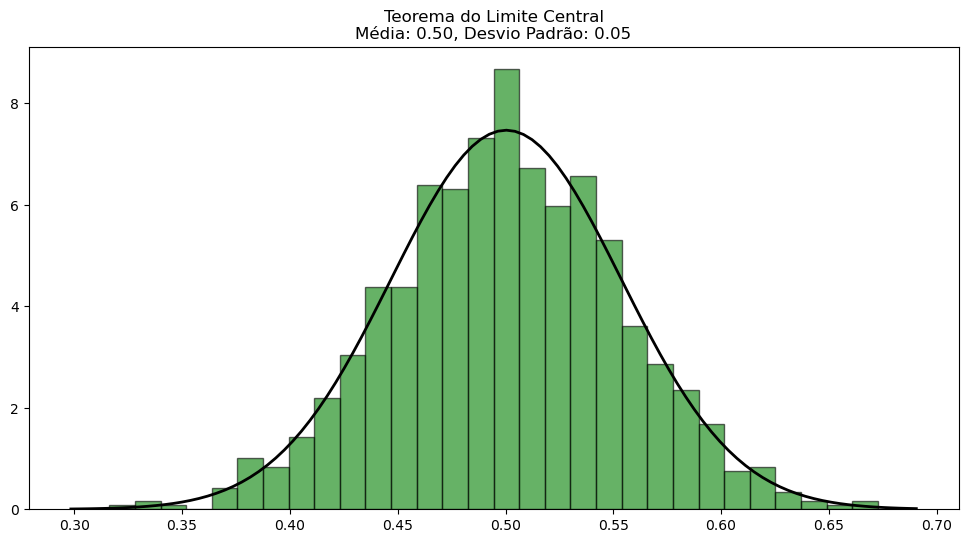

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parâmetros
num_samples = 1000  # Número de amostras
sample_size = 30    # Tamanho da amostra

# Gerar amostras uniformemente distribuídas
samples = np.random.uniform(low=0, high=1, size=(num_samples, sample_size))

# Calcular médias amostrais
sample_means = np.mean(samples, axis=1)

# Plotar histogramas
plt.figure(figsize=(12, 6))
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

# Plotar distribuição normal
mu, sigma = np.mean(sample_means), np.std(sample_means)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - mu) / sigma)**2) / (sigma * np.sqrt(2 * np.math.pi))
plt.plot(x, p, 'k', linewidth=2)
title = f'Teorema do Limite Central\nMédia: {mu:.2f}, Desvio Padrão: {sigma:.2f}'
plt.title(title)
plt.show()


# Erro - padrão

In [3]:
# A variabilidade desvio-padrão de uma estatística amostral sobre muitas amostras 
# (não deve ser confundida com desvio-padrão) o qual,por si mesmo, se refere à variabildiade de valores de dados individuais

In [10]:
import numpy as np

# Gerar dados amostrais
data = np.random.normal(loc=50, scale=10, size=100)  # Média 50, desvio padrão 10, tamanho da amostra 100
print(data)
# Calcular média amostral
mean_sample = np.mean(data)

# Calcular desvio padrão amostral
std_sample = np.std(data, ddof=1)

# Calcular erro padrão
n = len(data)
error_standard = std_sample / np.sqrt(n)

# Mostrar resultados
print(f"Média Amostral: {mean_sample:.2f}")
print(f"Desvio Padrão Amostral: {std_sample:.2f}")
print(f"Erro Padrão: {error_standard:.2f}")


[53.69346443 59.84513067 59.04257836 39.01543065 76.17656197 52.20042072
 42.37718391 47.91871702 54.42222629 43.08555277 57.80364424 51.97432652
 28.96668488 56.46903647 62.35120867 57.96845222 57.22222631 65.82123868
 62.7844672  45.07087501 41.49778363 54.06593531 58.80810439 64.35519432
 55.08778016 59.78641988 55.5769059  49.76470534 57.49019158 52.72518156
 45.14427295 61.94864583 54.3307149  38.63444788 64.25533819 59.84573795
 57.34744127 35.0036443  53.93176501 44.08343111 51.34393107 35.30862358
 32.6311359  46.96570831 63.39462214 54.31771599 46.12267921 61.01265358
 36.96968978 55.44056077 55.19577312 54.27472152 45.70942061 31.35393932
 46.90982144 43.93944775 45.13265901 58.55489049 44.17892329 44.44780549
 43.81328051 47.70949473 45.7888035  63.82980243 66.20155973 53.16165994
 50.71974035 52.16847793 48.21840862 46.65222305 32.60590575 62.86960425
 50.63976834 41.33822993 50.63510356 52.63152846 43.93778023 56.7246245
 49.61950376 52.40504078 61.42593542 46.23899697 48.

Estimativa da média: 50.62
Intervalo de confiança de 95%: [48.6440045  52.64801747]


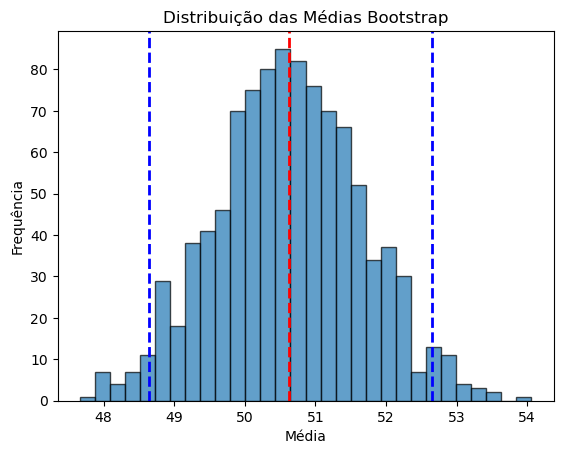

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar uma amostra original
np.random.seed(0)
data = np.random.normal(loc=50, scale=10, size=100)

# Função para realizar o bootstrap
def bootstrap(data, num_samples, statistic):
    samples = np.random.choice(data, (num_samples, len(data)), replace=True)
    stat = np.array([statistic(sample) for sample in samples])
    return stat

# Parâmetros do bootstrap
num_samples = 1000
statistic = np.mean

# Realizar o bootstrap
bootstrap_means = bootstrap(data, num_samples, statistic)

# Calcular intervalos de confiança
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Resultados
print(f'Estimativa da média: {np.mean(bootstrap_means):.2f}')
print(f'Intervalo de confiança de 95%: {confidence_interval}')

# Plotar a distribuição das médias bootstrap
plt.hist(bootstrap_means, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(np.mean(bootstrap_means), color='red', linestyle='dashed', linewidth=2)
plt.axvline(confidence_interval[0], color='blue', linestyle='dashed', linewidth=2)
plt.axvline(confidence_interval[1], color='blue', linestyle='dashed', linewidth=2)
plt.title('Distribuição das Médias Bootstrap')
plt.xlabel('Média')
plt.ylabel('Frequência')
plt.show()
